# Learning agents for Specification MDPs #

In this notebook we explore the implementations of 2 learning agents in the specification MDP domain. The first is the regular Q-learning to generate optimal policy in the optimal paradigm. The second one is soft-Q-Learning that generates maximum entropy policies that can represent multimodal optimal policies.

As usual we begin by importing our sample MDP problem

In [2]:
from utils import *
from Exploration import *
from LearningAgents import *
import matplotlib
%matplotlib inline

MDP = CreateSampleMDP()

Now lets define a standard Q-learning agent. This agent has $\gamma = 0.95$ and an $\epsilon$-greedy exploration policy with $\epsilon = 0.2$. We will train this agent for a maximum of 10000 episodes and an upper limit of number of actions taken to be 100,000. Each episode is limited to 20 actions.

In [3]:
q_agent = QLearningAgent(MDP)
q_agent.Q_init = 0.01
q_agent.eps = 0.2
q_agent.explore(episode_limit = 10000, action_limit = 100000, verbose=True)
#q_agent.visualize_exploration(prog='twopi')


Training episode 9900         

(95099, 10000)

We can test how well this policy performed by initializing a second agent with the policy learned by the Q-learning agent.

[-1.0, -1.0, -0.94720000000000004, -0.77733333333333343, 1.0]

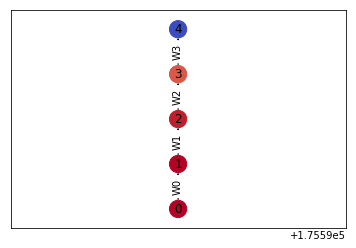

In [4]:
evaluator = ExplorerAgent(MDP, input_policy=q_agent.learned_policy)
evaluator.explore(episode_limit = 10)
evaluator.visualize_exploration(prog = 'twopi')

In [23]:
q_agent.MDP.initialize_state()
Qval = q_agent.get_max_Q_action(q_agent.MDP.state)[2]
(Qval)

array([  3.3201663 ,   2.82060697,   4.08298792,   3.03176686,
         2.050809  ,   0.64598403,  20.8602721 ,   5.17893829,   1.13844487])

In [16]:
q_agent.MDP.transition(q_agent.MDP.state, 'W0')
Qval = q_agent.get_max_Q_action(q_agent.MDP.state)[2]
Qval

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.64598403,  0.        ,  0.        ])

In [20]:
q_agent.MDP.transition(q_agent.MDP.state, 'W1')
Qval = q_agent.get_max_Q_action(q_agent.MDP.state)[2]
Qval

array([ 0.        ,  0.64598403,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ])

Now lets train a vanilla soft-q-learning agent

Training episode 5100         

[-1.0, -1.0]

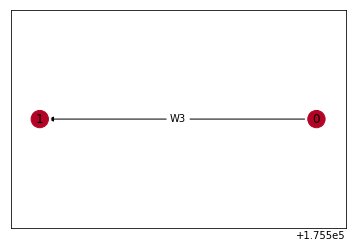

In [10]:
softmax_agent = QLearningAgent(MDP, soft_bellman=True)
softmax_agent.explore(episode_limit = 10000, action_limit = 100000, verbose = True)

evaluator = ExplorerAgent(MDP, input_policy=softmax_agent.learned_policy)
evaluator.explore(episode_limit = 10)
evaluator.visualize_exploration(prog = 'twopi')

This doesnt quite work. perhaps initializing the soft-Q-learning with the regular Q learning function might help?

In [12]:
softmax_agent = QLearningAgent(MDP, soft_bellman=True)
softmax_agent.Q_init = 0
softmax_agent.Q = q_agent.Q
softmax_agent.explore(episode_limit = 10000, action_limit = 100000, verbose = True)

Training episode 5000         

(100000, 5087)

[-1.0, -1.0, -1.0]

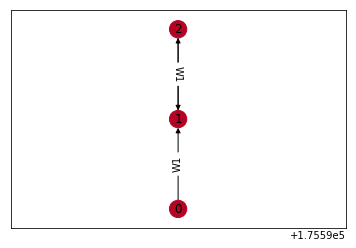

In [13]:
evaluator = ExplorerAgent(MDP, input_policy=softmax_agent.learned_softmax_policy)
evaluator.explore(episode_limit = 10)
evaluator.visualize_exploration(prog = 'twopi')

In [14]:
softmax_agent.MDP.initialize_state()
Qval = q_agent.get_max_Q_action(softmax_agent.MDP.state)[2]
softmax(Qval)

array([  2.41228558e-08,   1.46377006e-08,   5.17270776e-08,
         1.80791677e-08,   6.77881604e-09,   1.66358929e-09,
         9.99999725e-01,   1.54768701e-07,   2.72219444e-09])